Markov Chains

In [69]:
import matplotlib.pyplot as plt
import numpy as np

p_cleartom_cloudytod = 0.5
p_cloudytom_cloudytod = 0.5

p_cloudytom_cleartod = 0.1
p_cleartom_cleartod = 0.9


N = 50000
its = np.array(['Sunny', 'Rainy'])
its0 = its[1]

sunny = np.zeros(N)
rainy = np.zeros(N)

theta_ip1 = its0

#MC
for i in range(N):

    theta_i = theta_ip1

    if theta_i == 'Sunny':
        z = np.random.rand()

        if z<0.9:
            sunny[i] = 1
        else:
            theta_ip1 = 'Rainy'
            rainy[i] = 1

    if theta_i == 'Rainy':
        z = np.random.rand()

        if z<0.5:
            rainy[i] = 1
        else:
            theta_ip1 = 'Sunny'
            sunny[i] = 1



Now, the plots

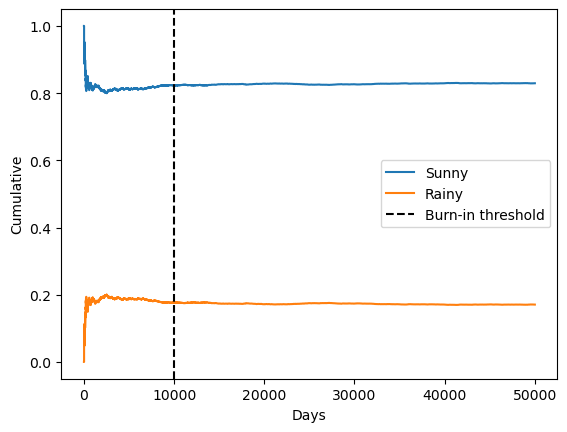

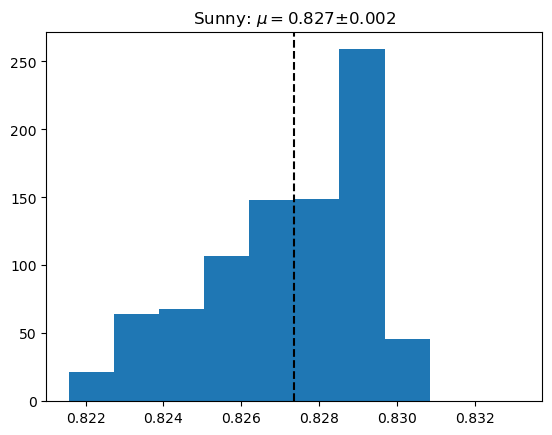

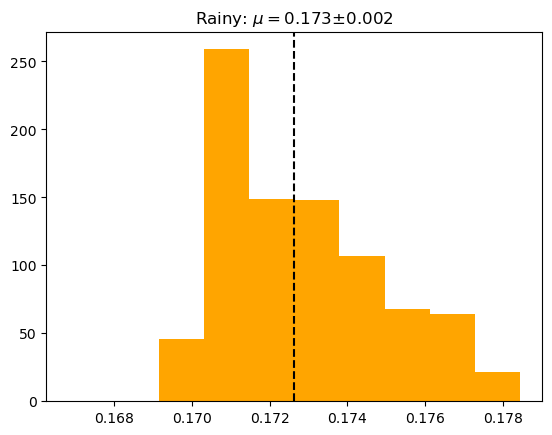

In [91]:
days = np.linspace(0,N,N)
burnin = 10000
sunny_cum = np.cumsum(sunny)/np.arange(1, N + 1)
rainy_cum = np.cumsum(rainy)/np.arange(1, N + 1)

sunny_mean = np.mean(sunny_cum[burnin:])
sunny_std = np.std(sunny_cum[burnin:])
rainy_mean = np.mean(rainy_cum[burnin:])
rainy_std = np.std(rainy_cum[burnin:])

plt.plot(days, sunny_cum, label='Sunny')
plt.plot(days, rainy_cum, label='Rainy')
plt.axvline(burnin, linestyle='--', color='black', label='Burn-in threshold')
plt.xlabel('Days')
plt.ylabel('Cumulative')
plt.legend()
plt.show()

plt.hist(sunny_cum, density=True, range=(sunny_mean-3*sunny_std, sunny_mean+3*sunny_std))
plt.title(f'Sunny: $\mu = ${round(sunny_mean, 3)}$\pm${round(sunny_std, 3)}')
plt.axvline(sunny_mean, linestyle='--', color='black')
plt.show()
plt.hist(rainy_cum, density=True, range=(rainy_mean-3*rainy_std, rainy_mean+3*rainy_std), color='orange')
plt.title(f'Rainy: $\mu = ${round(rainy_mean, 3)}$\pm${round(rainy_std, 3)}')
plt.axvline(rainy_mean, linestyle='--', color='black')
plt.show()